In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Data Kunjungan Wisatawan Mancanegara ke Indonesia berdasarkan Negara Tempat Tinggal Wisatawan Mancanegara Tahun 2023 (januari - agustus)
```data ini diambil dari badan pusat statistik indonesia```

Visualisasi ini akan menjawab beberapa pertanyaan seperti:
1. Negara mana yang paling banyak mengunjungi indonesia?
2. Negara mana yang paling sedikit mengunjungi indonesia?
3. Negara mana yang paling banyak mengunjungi indonesia pada bulan januari?
4. Negara mana yang paling banyak mengunjungi indonesia pada bulan februari?
5. Negara mana yang paling banyak mengunjungi indonesia pada bulan maret?
6. Negara mana yang paling banyak mengunjungi indonesia pada bulan april?
7. Negara mana yang paling banyak mengunjungi indonesia pada bulan mei?
8. Negara mana yang paling banyak mengunjungi indonesia pada bulan juni?
9. Negara mana yang paling banyak mengunjungi indonesia pada bulan juli?
10. Negara mana yang paling banyak mengunjungi indonesia pada bulan agustus?
11. Negara mana yang tidak pernah mengunjungi indonesia?

### EDA (Exploratory Data Analysis)
langkah-langkah yang akan dilakukan:
1. persiapkan data
2. cek data
3. cleaning data

#### persiapkan data
data diakses menggunakan library pandas, dan data yang digunakan adalah data kunjungan wisatawan mancanegara ke indonesia berdasarkan negara tempat tinggal wisatawan mancanegara tahun 2023 (januari - agustus) dalam bentuk format excel. 

In [2]:
df = pd.read_excel('Kunjungan Wisatawan Mancanegara 2023.xlsx', index_col=False, sheet_name='Kunjungan Wisatawan Mancanegara 2023')
df.head()

,Unnamed: 0,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0,-,-,-,-,-
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0,-,-,-,-,-
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0,-,-,-,-,-
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0,-,-,-,-,-
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0,-,-,-,-,-


copy data agar tidak merusak data asli

In [3]:
df1 = df.copy()
df1

,Unnamed: 0,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0,-,-,-,-,-
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0,-,-,-,-,-
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0,-,-,-,-,-
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0,-,-,-,-,-
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,GRAND TOTAL,735947.0,701931.0,869243.0,865810.0,953713.0,1062789.0,1121189.0,1132638.0,-,-,-,-,-
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Sumber: Kementerian Hukum dan HAM (Direktorat ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Source Url: https://www.bps.go.id/indicator/16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


rename kolom Unnamed: 0 menjadi Negara agar lebih mudah dalam mengakses data

In [4]:
df1 = df1.rename(columns={'Unnamed: 0': 'Negara'})
df1.tail()

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan
248,GRAND TOTAL,735947.0,701931.0,869243.0,865810.0,953713.0,1062789.0,1121189.0,1132638.0,-,-,-,-,-
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Sumber: Kementerian Hukum dan HAM (Direktorat ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Source Url: https://www.bps.go.id/indicator/16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,"Access Time: November 1, 2023, 9:53 am",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df1.columns[9:])

Index(['September', 'Oktober', 'November', 'Desember', 'Tahunan'], dtype='object')


drop kolom bulan yang tidak ada datanya, serta drop data yang tidak dibutuhkan

In [6]:
df1 = df1.drop(df1.columns[9:], axis=1)

In [7]:
df1

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0
...,...,...,...,...,...,...,...,...,...
248,GRAND TOTAL,735947.0,701931.0,869243.0,865810.0,953713.0,1062789.0,1121189.0,1132638.0
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Sumber: Kementerian Hukum dan HAM (Direktorat ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Source Url: https://www.bps.go.id/indicator/16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1 = df1.drop(df1.tail(4).index)
df1.tail()

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus
244,Zambia,12.0,6.0,15.0,11.0,17.0,26.0,11.0,37.0
245,Zimbabwe,60.0,59.0,68.0,56.0,102.0,73.0,75.0,133.0
246,Zomba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,TOTAL AFRICA,3621.0,3569.0,4408.0,4449.0,5394.0,5964.0,7341.0,8400.0
248,GRAND TOTAL,735947.0,701931.0,869243.0,865810.0,953713.0,1062789.0,1121189.0,1132638.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negara    249 non-null    object 
 1   Januari   249 non-null    float64
 2   Februari  249 non-null    float64
 3   Maret     249 non-null    float64
 4   April     249 non-null    float64
 5   Mei       249 non-null    float64
 6   Juni      249 non-null    float64
 7   Juli      249 non-null    float64
 8   Agustus   249 non-null    float64
dtypes: float64(8), object(1)
memory usage: 17.6+ KB


In [10]:
# hapus baris berdasarkan nama negara
df1 = df1.drop(df1[df1['Negara'] == 'Zomba'].index)
df1

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0
...,...,...,...,...,...,...,...,...,...
243,Zaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Zambia,12.0,6.0,15.0,11.0,17.0,26.0,11.0,37.0
245,Zimbabwe,60.0,59.0,68.0,56.0,102.0,73.0,75.0,133.0
247,TOTAL AFRICA,3621.0,3569.0,4408.0,4449.0,5394.0,5964.0,7341.0,8400.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 248
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negara    248 non-null    object 
 1   Januari   248 non-null    float64
 2   Februari  248 non-null    float64
 3   Maret     248 non-null    float64
 4   April     248 non-null    float64
 5   Mei       248 non-null    float64
 6   Juni      248 non-null    float64
 7   Juli      248 non-null    float64
 8   Agustus   248 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.4+ KB


In [12]:
df1 = df1.drop(df1[df1['Negara'] == 'GRAND TOTAL'].index)
df1

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0
...,...,...,...,...,...,...,...,...,...
242,Uganda,22.0,17.0,28.0,15.0,21.0,45.0,43.0,26.0
243,Zaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Zambia,12.0,6.0,15.0,11.0,17.0,26.0,11.0,37.0
245,Zimbabwe,60.0,59.0,68.0,56.0,102.0,73.0,75.0,133.0


In [13]:
# totalkan jumlah kunjungan wisatawan mancanegara per tahun
df1['Total'] = df1.sum(axis=1)
df1


C:\Program Files\KMSpico\temp\ipykernel_10068\3687090036.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1['Total'] = df1.sum(axis=1)


,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0,7877.0
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0,1206701.0
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0,131321.0
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0,883319.0
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0,68185.0
...,...,...,...,...,...,...,...,...,...,...
242,Uganda,22.0,17.0,28.0,15.0,21.0,45.0,43.0,26.0,217.0
243,Zaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Zambia,12.0,6.0,15.0,11.0,17.0,26.0,11.0,37.0,135.0
245,Zimbabwe,60.0,59.0,68.0,56.0,102.0,73.0,75.0,133.0,626.0


In [14]:
df2 = df1.copy()
df2

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0,7877.0
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0,1206701.0
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0,131321.0
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0,883319.0
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0,68185.0
...,...,...,...,...,...,...,...,...,...,...
242,Uganda,22.0,17.0,28.0,15.0,21.0,45.0,43.0,26.0,217.0
243,Zaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Zambia,12.0,6.0,15.0,11.0,17.0,26.0,11.0,37.0,135.0
245,Zimbabwe,60.0,59.0,68.0,56.0,102.0,73.0,75.0,133.0,626.0


In [15]:
drop_not_country = ['GRAND TOTAL','A S E A N', 'lain-lain', 'TOTAL ASIA (Excl.ASEAN)', 'Other Middle East', 'TOTAL MIDDLE EAST', 'Other Asia', 'Indonesia','TOTAL AMERICA', 'Other West Europe' ,'Other East Europe' ,'TOTAL EUROPE', 'Other America','TOTAL OCEANIA', 'Other Africa' ,'TOTAL AFRICA' ]
df2 = df2[~df2.Negara.isin(drop_not_country)]
df2

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
0,Brunei Darussalam,585.0,815.0,928.0,740.0,894.0,969.0,1151.0,1795.0,7877.0
1,Malaysia,112287.0,127020.0,152447.0,147248.0,169185.0,168759.0,154967.0,174788.0,1206701.0
2,Philippines,12065.0,12299.0,14964.0,15858.0,16911.0,19091.0,20868.0,19265.0,131321.0
3,Singapore,96032.0,75192.0,124340.0,97280.0,100729.0,174443.0,109847.0,105456.0,883319.0
4,Thailand,4745.0,6063.0,9411.0,7320.0,8798.0,8913.0,12368.0,10567.0,68185.0
...,...,...,...,...,...,...,...,...,...,...
241,Tunisia,222.0,295.0,292.0,220.0,800.0,517.0,1163.0,1684.0,5193.0
242,Uganda,22.0,17.0,28.0,15.0,21.0,45.0,43.0,26.0,217.0
243,Zaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Zambia,12.0,6.0,15.0,11.0,17.0,26.0,11.0,37.0,135.0


Simpan data yang sudah di cleaning ke dalam sheet baru dalam file excel

In [16]:
writer = pd.ExcelWriter('Kunjungan Wisatawan Mancanegara 2023.xlsx')
df.to_excel(writer, sheet_name='Kunjungan Wisatawan Mancanegara 2023', index=False)
df1.to_excel(writer, sheet_name='Kunjungan Wisatawan Mancanegara 2023 (cleaned)', index=False)
df2.to_excel(writer, sheet_name='Kunjungan Wisatawan Mancanegara 2023 (cleaned all)', index=False)
writer.save()
writer.close()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Program Files\KMSpico\temp\ipykernel_10068\601477356.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## Visualisasi Data

In [17]:
data = pd.read_excel('Kunjungan Wisatawan Mancanegara 2023.xlsx', sheet_name='Kunjungan Wisatawan Mancanegara 2023 (cleaned all)')
data

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
0,Brunei Darussalam,585,815,928,740,894,969,1151,1795,7877
1,Malaysia,112287,127020,152447,147248,169185,168759,154967,174788,1206701
2,Philippines,12065,12299,14964,15858,16911,19091,20868,19265,131321
3,Singapore,96032,75192,124340,97280,100729,174443,109847,105456,883319
4,Thailand,4745,6063,9411,7320,8798,8913,12368,10567,68185
...,...,...,...,...,...,...,...,...,...,...
228,Tunisia,222,295,292,220,800,517,1163,1684,5193
229,Uganda,22,17,28,15,21,45,43,26,217
230,Zaire,0,0,0,0,0,0,0,0,0
231,Zambia,12,6,15,11,17,26,11,37,135


In [18]:
data_filtered_10up = data.sort_values(by='Total', ascending=False).head(10).reset_index(drop=True)
data_filtered_10up.index = np.arange(1, len(data_filtered_10up)+1)
data_filtered_10up 

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
1,Malaysia,112287,127020,152447,147248,169185,168759,154967,174788,1206701
2,Australia,99089,84768,96333,109881,113863,132478,143062,129063,908537
3,Singapore,96032,75192,124340,97280,100729,174443,109847,105456,883319
4,Timor Leste,70403,55946,63596,61077,60508,52719,55991,64285,484525
5,China,27080,34350,54549,55090,64056,62499,84955,85198,467777
6,India,32839,36509,40989,48747,62680,68853,54906,48472,393995
7,United States of America,21095,24714,30982,31617,35524,39340,41147,35359,259778
8,United Kingdom,17944,18974,27798,29555,29460,28644,34667,35822,222864
9,South Korea,27243,24712,21512,18436,26271,27036,38225,36342,219777
10,France,10587,12476,14176,20970,24889,20525,38015,41235,182873


In [19]:
data_filtered_10bottom = data[data['Total'] > 0].sort_values(by='Total', ascending=True).head(10).reset_index(drop=True)
data_filtered_10bottom.index = np.arange(1, len(data_filtered_10bottom)+1)
data_filtered_10bottom

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
1,Puertorico,0,0,1,0,0,0,0,0,1
2,Guinea Equator,0,0,0,0,0,0,1,1,2
3,Sao Tome & Principe,0,0,1,0,1,0,0,1,3
4,Marshall Islands,2,2,1,0,0,0,0,0,5
5,Korea Utara,0,0,0,0,0,1,1,3,5
6,Vatikan,1,2,1,0,0,1,0,2,7
7,Stateless,0,1,1,0,2,1,3,0,8
8,Afrika Tengah Rep.,0,2,0,0,1,0,0,6,9
9,Tuvalu,3,0,0,0,5,0,1,0,9
10,Guinea Bissau,0,0,1,1,1,2,3,2,10


#### Visualisasi data dibawah ini menjawab pertanyaan 'Negara mana yang paling banyak mengunjungi indonesia?'

C:\Program Files\KMSpico\temp\ipykernel_10068\4289134021.py:9: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



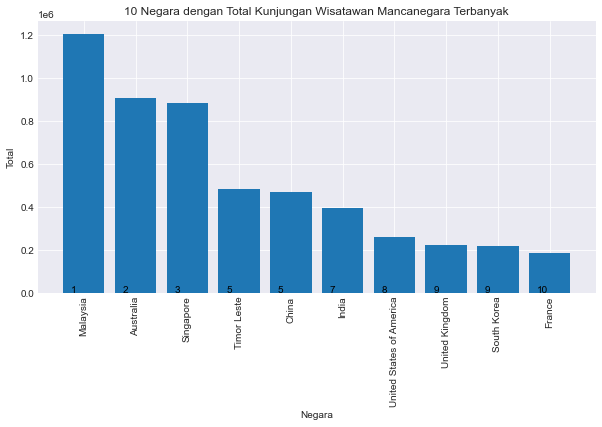

In [44]:
plt.figure(figsize=(10,5))
plt.bar(data_filtered_10up['Negara'], data_filtered_10up['Total'])
plt.xticks(rotation=90)
plt.xlabel('Negara')
plt.ylabel('Total')
plt.title('10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terbanyak')
for i, v in enumerate(data_filtered_10bottom['Total']):
    plt.text(i-.25, v+.1, str(v), color='black')
plt.style.use('seaborn-darkgrid')
plt.savefig('./hasil visualisasi/10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terbanyak.png')
plt.show()


dari visualiasi menggunakan bar chart diatas yang menampilkan 10 negara yang paling banyak mengunjungi Indonesia pada tahun 2023 (januari-Agustus) adalah:
1. Malaysia dengan jumlah kunjungan 1.206.071 pengunjung
2. Australia dengan jumlah kunjungan 908.537 pengunjung
3. Singapura dengan jumlah kunjungan 883.319 pengunjung
4. Timor Leste dengan jumlah kunjungan 484.525 pengunjung
5. China dengan jumlah kunjungan  467.777 pengunjung
6. India dengan jumlah kunjungan  393.995 pengunjung
8. Amerika Serikat dengan jumlah kunjungan 259.778 pengunjung
9. Korea Selatan dengan jumlah kunjungan  222.864 pengunjung
10. Perancis dengan jumlah kunjungan  182.873 pengunjung

Dari data yang telah disebutkan diatas Negara yang paling banyak mengunjungi Indonesia adalah Malaysia dengan jumlah kunjungan 1.206.071 pengunjung

#### Visualisasi data dibawah ini menjawab pertanyaan 'Negara mana yang paling sedikit mengunjungi indonesia?'

C:\Program Files\KMSpico\temp\ipykernel_10068\526417692.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


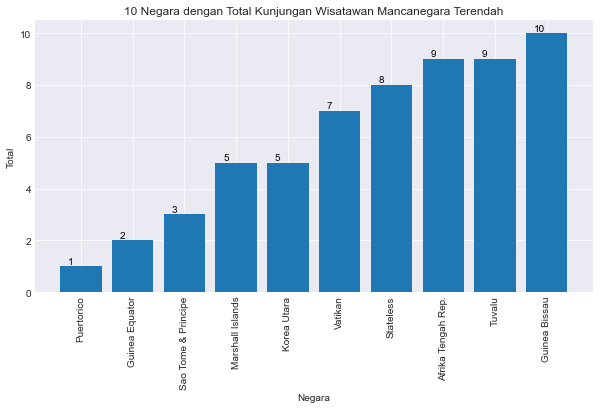

In [21]:
plt.figure(figsize=(10,5))
plt.bar(data_filtered_10bottom['Negara'], data_filtered_10bottom['Total'])
plt.xticks(rotation=90)
plt.xlabel('Negara')
plt.ylabel('Total')
plt.title('10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terendah')
for i, v in enumerate(data_filtered_10bottom['Total']):
    plt.text(i-.25, v+.1, str(v), color='black')
plt.style.use('seaborn-darkgrid')
plt.savefig('./hasil visualisasi/10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terendah.png')
plt.show()


dari visualiasi menggunakan bar chart diatas yang menampilkan 10 negara yang paling sedikit mengunjungi Indonesia pada tahun 2023 (januari-Agustus) adalah:
1. Puertoriko dengan jumlah kunjungan 1 pengunjung
2. Guinea Equador dengan jumlah kunjungan 2 pengunjung
3. Sao Tome dan Principe dengan jumlah kunjungan 3 pengunjung
4. Marshall Island dengan jumlah kunjungan 5 pengunjung
6. Korea Utara dengan jumlah kunjungan 5 pengunjung
7. Vatikan dengan jumlah kunjungan 7 pengunjung
8. Stateless dengan jumlah kunjungan 8 pengunjung
9. Republik Afrika Tengah dengan jumlah kunjungan 9 pengunjung
10. Guinea Bissau dengan jumlah kunjungan 10 pengunjung

Dari data yang telah disebutkan diatas Negara yang paling sedikit mengunjungi Indonesia adalah Puertoriko dengan jumlah kunjungan 1 pengunjung

#### data dibawah ini menjawab pertanyaan 'Negara mana saja yang tidak pernah mengunjungi indonesia pada tahun 2023 (januari-Agustus)?'

In [22]:
country_not_visited = data[data['Total'] == 0].reset_index(drop=True)
country_not_visited.index = np.arange(1, len(country_not_visited)+1)
country_not_visited

,Negara,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,Total
1,British Indian Ocean Teritory,0,0,0,0,0,0,0,0,0
2,Tibet,0,0,0,0,0,0,0,0,0
3,Hellenic,0,0,0,0,0,0,0,0,0
4,Scotlandia,0,0,0,0,0,0,0,0,0
5,Volta Atas,0,0,0,0,0,0,0,0,0
6,Wales,0,0,0,0,0,0,0,0,0
7,Siberia,0,0,0,0,0,0,0,0,0
8,Yugoslavia,0,0,0,0,0,0,0,0,0
9,Falkland Islands,0,0,0,0,0,0,0,0,0
10,Guiana,0,0,0,0,0,0,0,0,0


Orang - orang dari Negara tersebut mungkin tidak tertarik untuk mengunjungi Indonesia, atau mungkin Negara tersebut tidak memiliki hubungan diplomatik dengan Indonesia, sehingga tidak ada orang dari Negara tersebut yang mengunjungi Indonesia.

#### Visualisasi data dibawah ini menampilkan grafik jumlah pengunjung wisatawan mancanegara dari bulan januari sampai bulan agustus pada tahun 2023

In [23]:
data_jumlah_kunjungan_bulan = data.sum(axis=0)
data_jumlah_kunjungan_bulan.drop(['Negara', 'Total'], inplace=True)
data_jumlah_kunjungan_bulan = pd.DataFrame(data_jumlah_kunjungan_bulan, columns=['Total'])
data_jumlah_kunjungan_bulan

,Total
Januari,701828
Februari,681163
Maret,844251
April,833662
Mei,939162
Juni,1046309
Juli,1100659
Agustus,1110714


C:\Program Files\KMSpico\temp\ipykernel_10068\377981602.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


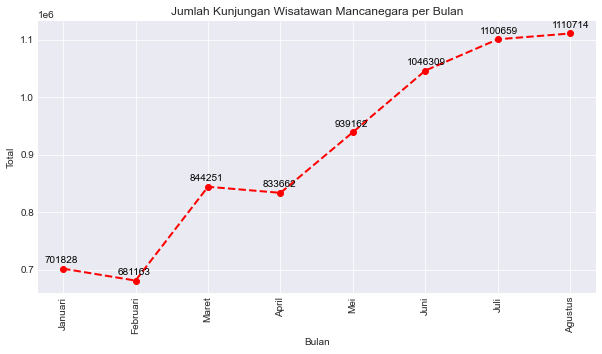

In [24]:
# visualisasi data jumlah kunjungan wisatawan mancanegara per bulan menggunakan line chart
plt.figure(figsize=(10,5))
plt.plot(data_jumlah_kunjungan_bulan.index, data_jumlah_kunjungan_bulan['Total'], marker='o', color='r', linestyle='--', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Bulan')
plt.ylabel('Total')
plt.title('Jumlah Kunjungan Wisatawan Mancanegara per Bulan')
# menampilkan nilai di setiap titik data
for i, v in enumerate(data_jumlah_kunjungan_bulan['Total']):
    plt.text(i-.25, v+10000, str(v), color='black')
plt.style.use('seaborn-darkgrid')
plt.savefig('./hasil visualisasi/Grafik Jumlah Kunjungan Wisatawan Mancanegara per Bulan.png')
plt.show()



dari data grafik diatas dapat dilihat bahwa pengunjung yang data ke Indonesia dari bulan januari sampai bulan agustus pada tahun 2023 mengalami peningkatan dari bulan ke bulan, kecuali pada bulan februari dan april mengalami penurunan dari bulan sebelumnya.

In [25]:
data_top10_januari = data[['Negara', 'Januari']].sort_values(by='Januari', ascending=False).head(10).reset_index(drop=True)
data_top10_januari.index = np.arange(1, len(data_top10_januari)+1)
data_top10_januari



,Negara,Januari
1,Malaysia,112287
2,Australia,99089
3,Singapore,96032
4,Timor Leste,70403
5,India,32839
6,South Korea,27243
7,China,27080
8,R u s i a,23335
9,United States of America,21095
10,United Kingdom,17944


In [26]:
data_top10_februari = data[['Negara', 'Februari']].sort_values(by='Februari', ascending=False).head(10).reset_index(drop=True)
data_top10_februari.index = np.arange(1, len(data_top10_februari)+1)
data_top10_februari

,Negara,Februari
1,Malaysia,127020
2,Australia,84768
3,Singapore,75192
4,Timor Leste,55946
5,India,36509
6,China,34350
7,United States of America,24714
8,South Korea,24712
9,United Kingdom,18974
10,R u s i a,18302


In [27]:
data_top10_maret = data[['Negara', 'Maret']].sort_values(by='Maret', ascending=False).head(10).reset_index(drop=True)
data_top10_maret.index = np.arange(1, len(data_top10_maret)+1)
data_top10_maret

,Negara,Maret
1,Malaysia,152447
2,Singapore,124340
3,Australia,96333
4,Timor Leste,63596
5,China,54549
6,India,40989
7,United States of America,30982
8,United Kingdom,27798
9,South Korea,21512
10,Germany,19353


In [28]:
data_top10_april = data[['Negara', 'April']].sort_values(by='April', ascending=False).head(10).reset_index(drop=True)
data_top10_april.index = np.arange(1, len(data_top10_april)+1)
data_top10_april

,Negara,April
1,Malaysia,147248
2,Australia,109881
3,Singapore,97280
4,Timor Leste,61077
5,China,55090
6,India,48747
7,United States of America,31617
8,United Kingdom,29555
9,France,20970
10,Germany,20496


In [29]:
data_top10_mei = data[['Negara', 'Mei']].sort_values(by='Mei', ascending=False).head(10).reset_index(drop=True)
data_top10_mei.index = np.arange(1, len(data_top10_mei)+1)
data_top10_mei

,Negara,Mei
1,Malaysia,169185
2,Australia,113863
3,Singapore,100729
4,China,64056
5,India,62680
6,Timor Leste,60508
7,United States of America,35524
8,United Kingdom,29460
9,South Korea,26271
10,France,24889


In [30]:
data_top10_juni = data[['Negara', 'Juni']].sort_values(by='Juni', ascending=False).head(10).reset_index(drop=True)
data_top10_juni.index = np.arange(1, len(data_top10_juni)+1)
data_top10_juni

,Negara,Juni
1,Singapore,174443
2,Malaysia,168759
3,Australia,132478
4,India,68853
5,China,62499
6,Timor Leste,52719
7,United States of America,39340
8,United Kingdom,28644
9,South Korea,27036
10,Germany,20553


In [31]:
data_top10_juli = data[['Negara', 'Juli']].sort_values(by='Juli', ascending=False).head(10).reset_index(drop=True)
data_top10_juli.index = np.arange(1, len(data_top10_juli)+1)
data_top10_juli

,Negara,Juli
1,Malaysia,154967
2,Australia,143062
3,Singapore,109847
4,China,84955
5,Timor Leste,55991
6,India,54906
7,United States of America,41147
8,South Korea,38225
9,France,38015
10,Netherlands,37772


In [32]:
data_top10_agustus = data[['Negara', 'Agustus']].sort_values(by='Agustus', ascending=False).head(10).reset_index(drop=True)
data_top10_agustus.index = np.arange(1, len(data_top10_agustus)+1)
data_top10_agustus

,Negara,Agustus
1,Malaysia,174788
2,Australia,129063
3,Singapore,105456
4,China,85198
5,Timor Leste,64285
6,India,48472
7,France,41235
8,South Korea,36342
9,United Kingdom,35822
10,United States of America,35359


In [46]:
# buat dahsboard menggunakan dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table

app = dash.Dash()

app.layout = html.Div(children=[
    html.Div(className='row',
             children=[
                 html.H1("Dashboard Kunjungan Wisatawan Mancanegara ke Indonesia", style={
                         'text-align': 'center', 'color': '#003BB0'}),
                 #  buat menjadi 2 kolom
                 html.Div(className='column',
                          children=[
                              dcc.Graph(
                                    id='10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terbanyak',
                                    figure={
                                        'data': [
                                            {'x': data_filtered_10up['Negara'], 'y': data_filtered_10up['Total'], 'type': 'bar',
                                             'name': '10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terbanyak'},
                                        ],
                                        'layout': {
                                            'title': '10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terbanyak',
                                            'xaxis': {'title': 'Negara'},
                                            'yaxis': {'title': 'Total'},
                                            'plot_bgcolor': '#C0C0C0',
                                            'paper_bgcolor': '#C0C0C0',
                                            'font': {'color': '#003BB0'}
                                        }
                                    }
                              ),
                          ]),
                 html.Div(className='column',
                          children=[
                              dcc.Graph(
                                    id='10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terendah',
                                    figure={
                                        'data': [
                                            {'x': data_filtered_10bottom['Negara'], 'y': data_filtered_10bottom['Total'],
                                             'type': 'bar', 'name': '10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terendah'},
                                        ],
                                        'layout': {
                                            'title': '10 Negara dengan Total Kunjungan Wisatawan Mancanegara Terendah',
                                            'xaxis': {'title': 'Negara'},
                                            'yaxis': {'title': 'Total'},
                                            'plot_bgcolor': '#C0C0C0',
                                            'paper_bgcolor': '#C0C0C0',
                                            'font': {'color': '#003BB0'}
                                        }
                                    }
                              ),

                          ]),
                               html.Div(className='column',
                            children=[
                              dcc.Graph(
                                    id='Jumlah Kunjungan Wisatawan Mancanegara per Bulan',
                                    figure={
                                        'data': [
                                            {'x': data_jumlah_kunjungan_bulan.index, 'y': data_jumlah_kunjungan_bulan['Total'], 'type': 'line',
                                             'name': 'Jumlah Kunjungan Wisatawan Mancanegara per Bulan'},
                                        ],
                                        'layout': {
                                            'title': 'Jumlah Kunjungan Wisatawan Mancanegara per Bulan',
                                            'xaxis': {'title': 'Bulan'},
                                            'yaxis': {'title': 'Total'},
                                            'plot_bgcolor': '#C0C0C0',
                                            'paper_bgcolor': '#C0C0C0',
                                            'font': {'color': '#003BB0'}
                                        }
                                    }
                              ),
                            ]), 
                    html.Div(className='column',
                            children=[
                            html.H3('Negara yang tidak mengunjungi Indonesia', style={'color': '#003BB0'}),
                              dash_table.DataTable(
                                    id='table',
                                    columns=[{"name": i, "id": i} for i in country_not_visited.columns[0:1]],
                                    data=country_not_visited.to_dict('records'),
                                    style_cell={'textAlign': 'center',
                                                'backgroundColor': '#C0C0C0',
                                                'color': '#003BB0',
                                                'border': '1px solid grey'},
                                    style_header={'backgroundColor': '#003BB0',
                                                  'fontWeight': 'bold',
                                                  'color': 'white',
                                                  'border': '1px solid grey'},
                                    style_data_conditional=[{
                                        'if': {'row_index': 'odd'},
                                        'backgroundColor': '#C0C0C0'
                                    }],
                                    style_table={'maxHeight': '300px',
                                                 'overflowY': 'none',
                                                 'border': 'thin lightgrey solid'}
                              ),
                            ]),
               
             ]),
])

# save dashboard
app.run_server(debug=True, port=2020)




C:\Program Files\KMSpico\temp\ipykernel_10068\1783797727.py:5: UserWarning:


The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`

